# Inference Comparison

In [1]:
import os
import sys
from pathlib import Path

repo_root = Path(os.getcwd()).parent
sys.path.insert(0, str(repo_root))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.ticker import AutoMinorLocator

from pipeline import harmony
from pipeline.cosmological_reading.extract_constraints import plot_likelihood

plt.style.use(harmony)

[2020-07-24 14:34:43 (+0:00:33) WARNING] No handles with labels found to put in legend.
[2020-07-24 14:34:43 (+0:00:33) WARNING] No handles with labels found to put in legend.


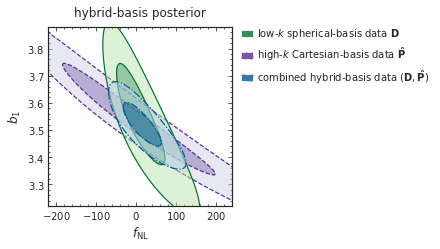

In [4]:
NG = 0  # 100

storage = repo_root/"storage"/"processed"/"likelihoods"

results = np.load(storage/"posterior_hybrid_full-sky_NG{}.npz".format(NG))

figure, *results = plot_likelihood(
    [result for result in results['cartesian']], [result for result in results['spherical']],
    [res_cart + res_sph for res_cart, res_sph in zip(results['cartesian'], results['spherical'])],
    sample_points_x=[results['f_nl'], results['f_nl'], results['f_nl']],
    sample_points_y=[results['b_1'], results['b_1'], results['b_1']],
    label_x=r'f_{\mathrm{NL}}',
    label_y=r'b_1',
    precision_x=0,
    precision_y=3,
    # truth_x=NG,
    scatter_plot=False,
    cmap=['Purples', 'Greens', 'Blues'],
    label=[
        'high-$k$ Cartesian-basis data $\mathbf{\hat{P}}$',
        'low-$k$ spherical-basis data $\mathbf{D}$',
        'combined hybrid-basis data $(\mathbf{D}, \mathbf{\hat{P}})$',
    ]
)

main, top_panel, side_panel = figure.axes;
main.get_legend().remove()

figure.set_size_inches(4.4, 4.4)
figure.delaxes(top_panel); figure.delaxes(side_panel)

from pipeline.cosmological_reading.extract_constraints import legend_state

handles, labels = legend_state

main.legend(
    [handles[shuff_idx] for shuff_idx in [1, 0, -1]], 
    [labels[shuff_idx] for shuff_idx in [1, 0, -1]], 
    bbox_to_anchor=(1., 1.05), loc='upper left', handletextpad=0.4, fontsize='medium'
)

main.set_xlim(-220, 240)
main.set_ylim(3.22, 3.88)
main.set_title("hybrid-basis posterior", fontsize='large', pad=10)

figure.savefig(repo_root/"notebooks"/"publications"/"posterior_hybrid_full-sky_NG{}.pdf".format(NG))